In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import *

#Ecuaciones de una variable:

Para los siguiente problemas:

1.0 ¿Para que ángulo el area del segmento circular es igual a un cuarto del area de la circunferencia?

- Muestre que la expresión que permite resolver el problema:

\begin{equation}
    \theta - sin \theta = \frac{\pi}{2}
\end{equation}

Una forma de expresar el problema es:

\begin{equation}
    A_a - A_\Delta = \frac{\pi R^2}{4}
\end{equation}    

Donde $A_a$ es el area de un sector circular de angulo $\theta$ y $A_\Delta$ es el triangulo obtenido al trazar una recta entre el ánguloy la circunferencia,de lo anterior tenemos:$$A_a = \frac{\theta R^2}{2}$$ 


$$A_\Delta = \frac{b*h}{2}$$

De esto obtenemos: $$A_\Delta = r^2 \frac{sin\theta}{2}$$

Luego de reemplazar $A_a$ y $A_\Delta$ enla primera ecuación quedamos con: $$\theta-sinθ = \frac{\pi}{2}$$

- ¿Construya una grafica para theta?, Alrededor de que punto esta solución.(Para este punto se recomienda emplear un data frame de pandas )

In [3]:
N= 100
ini = 0 
fin = 2*np.pi
theta = np.linspace(ini, fin, N)

In [4]:
def func(theta):
    return theta-np.sin(theta)-np.pi/2

In [5]:
value_f = func(theta)

In [6]:
d = {"theta":theta , "funcion":value_f}
df = pd.DataFrame(d)

In [7]:
theta = np.linspace(ini, fin, N)
y= np.sin(theta)

In [8]:
pd.DataFrame(np.array([theta, y]).T, columns=["x","y"])

,x,y
0,0.000000,0.000000e+00
1,0.063467,6.342392e-02
2,0.126933,1.265925e-01
3,0.190400,1.892512e-01
4,0.253866,2.511480e-01
...,...,...
95,6.029319,-2.511480e-01
96,6.092786,-1.892512e-01
97,6.156252,-1.265925e-01
98,6.219719,-6.342392e-02


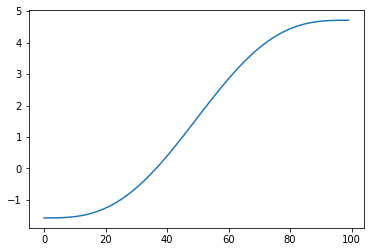

In [9]:
plt.plot(func(theta))

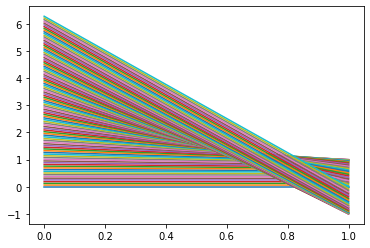

In [10]:
plt.plot(pd.DataFrame(np.array([theta, y])))
plt.show()

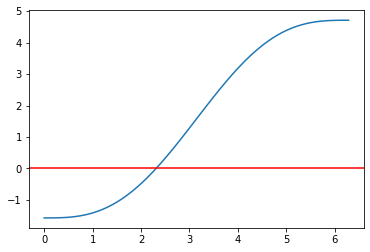

In [11]:
plt.plot(df.theta,df.funcion)
plt.axhline(y=0, color='r', linestyle='-')

- Emplee el metodo de biseccion, punto fijo, newton y secante para comprobar la solución intuida del apartado anterior.

In [12]:
bisect(func, 1, 3) #bisección 1

2.309881460010729

In [13]:
def fun(theta,a,b):
  return theta-np.sin(theta)-np.pi/2

In [14]:
bisect(fun, 1, 3, args = (1,2)) #bisección 2

2.309881460010729

In [16]:
f= lambda theta: theta-np.sin(theta)-np.pi/2
g= lambda theta: theta-f(theta)

In [23]:
from scipy.optimize.minpack import fixed_point
fixed_point(g, 1, maxiter=1000) #punto fijo

array(2.30988146)

In [24]:
h = lambda theta: 1 - np.cos(theta)
newton(func, -1, fprime=h) #Newton

2.3098814600100575

In [25]:
newton(func, -1) #secante

2.3098814600100575

2.0 An object falling vertically through the air is subjected to viscous resistance as well as to the force of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the object after t seconds is
\begin{equation}
    s(t)=s_0 - \frac{mg}{k}t - m\left( \frac{(mg+kv_o)}{k^2}\right) (1-e^{-kt/m})
\end{equation}
where $g = 32.17 ft/s2$ and $k$ represents the coefficient of air resistance in $lbs/ft$. Suppose $s0 = 300 ft$
$m = 0.25$ lb, and $k = 0.1$ lbs/ft. Find, to within $0.01$ s, the time it takes this quarter-pounder to hit the ground

- Emplee el metodo de biseccion, punto fijo, newton y secante para comprobrar la solución.

In [44]:
#datos y función ppal

g = 32.17
s0= 300
m = 0.25
k =  0.1

def h(t):
  return s0 - m*g*t/k - (m**2)*g/(k**2)*(1-np.exp(-(k*t/m)))

In [47]:
# distintos métodos de solución

s1= bisect(h,1,3) #bisección

h_g = lambda t: t-h(t)

s2= fixed_point(h_g,3, maxiter=1000) #punto fijo

h_p = lambda t: ((2*t*np.exp(-k*t/m) + (t**2)*(-k/m)*np.exp(-k*t/m)) -2*t - 1)*(m*g/k)

s3= newton(h,1,fprime=h_p) #newton

s4= newton(h,1) #secante

print (f'Bisección: {s1:.3f}s')
print (f'Punto fijo: {s2:.3f}s')
print (f'Newton: {s3:.3f}s')
print (f'Secante: {s4:.3f}s')

Bisección: 2.248s
Punto fijo: 2.248s
Newton: 2.248s
Secante: 2.248s


3.0 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:
\begin{equation}
    m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente
Para T = 0.5, determine:

- a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)
- b. Valide su respuestado con el metodo de punto fijo. (Muestre su resultado con 4 cifras)
- d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

In [50]:
#a

T = 0.5

def mt(m):
  return np.tanh(m/T)-m

s5=newton(mt,1)

print(f'resultado: {s5:.4f}')

resultado: 0.9575


In [51]:
#b

mt_g = lambda m: m-mt(m)

s6= fixed_point(mt_g, 3, maxiter=1000)

print(f'resultado: {s6:.4f}')

resultado: 0.9575


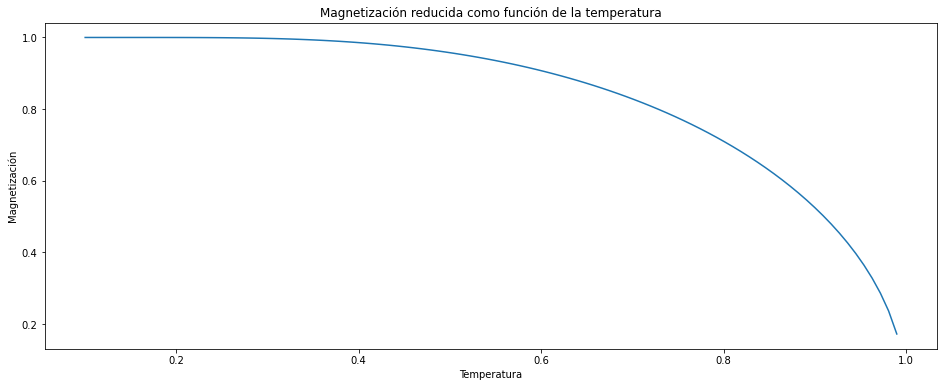

In [59]:
gs = np.zeros(100)

T = np.linspace(0.1, .99, 100)

for i, B in enumerate(T):
    T = B
    gs[i] = newton(mt, 1)

T=T = np.linspace(0.1, .99, 100)

plt.figure(figsize=(16,6))
plt.plot(T, gs)
plt.title('Magnetización reducida como función de la temperatura')
plt.ylabel('Magnetización')
plt.xlabel('Temperatura')
plt.show()    

Construir un fractal empleando el metodo de Newton-Raphson, reproducir código y entender

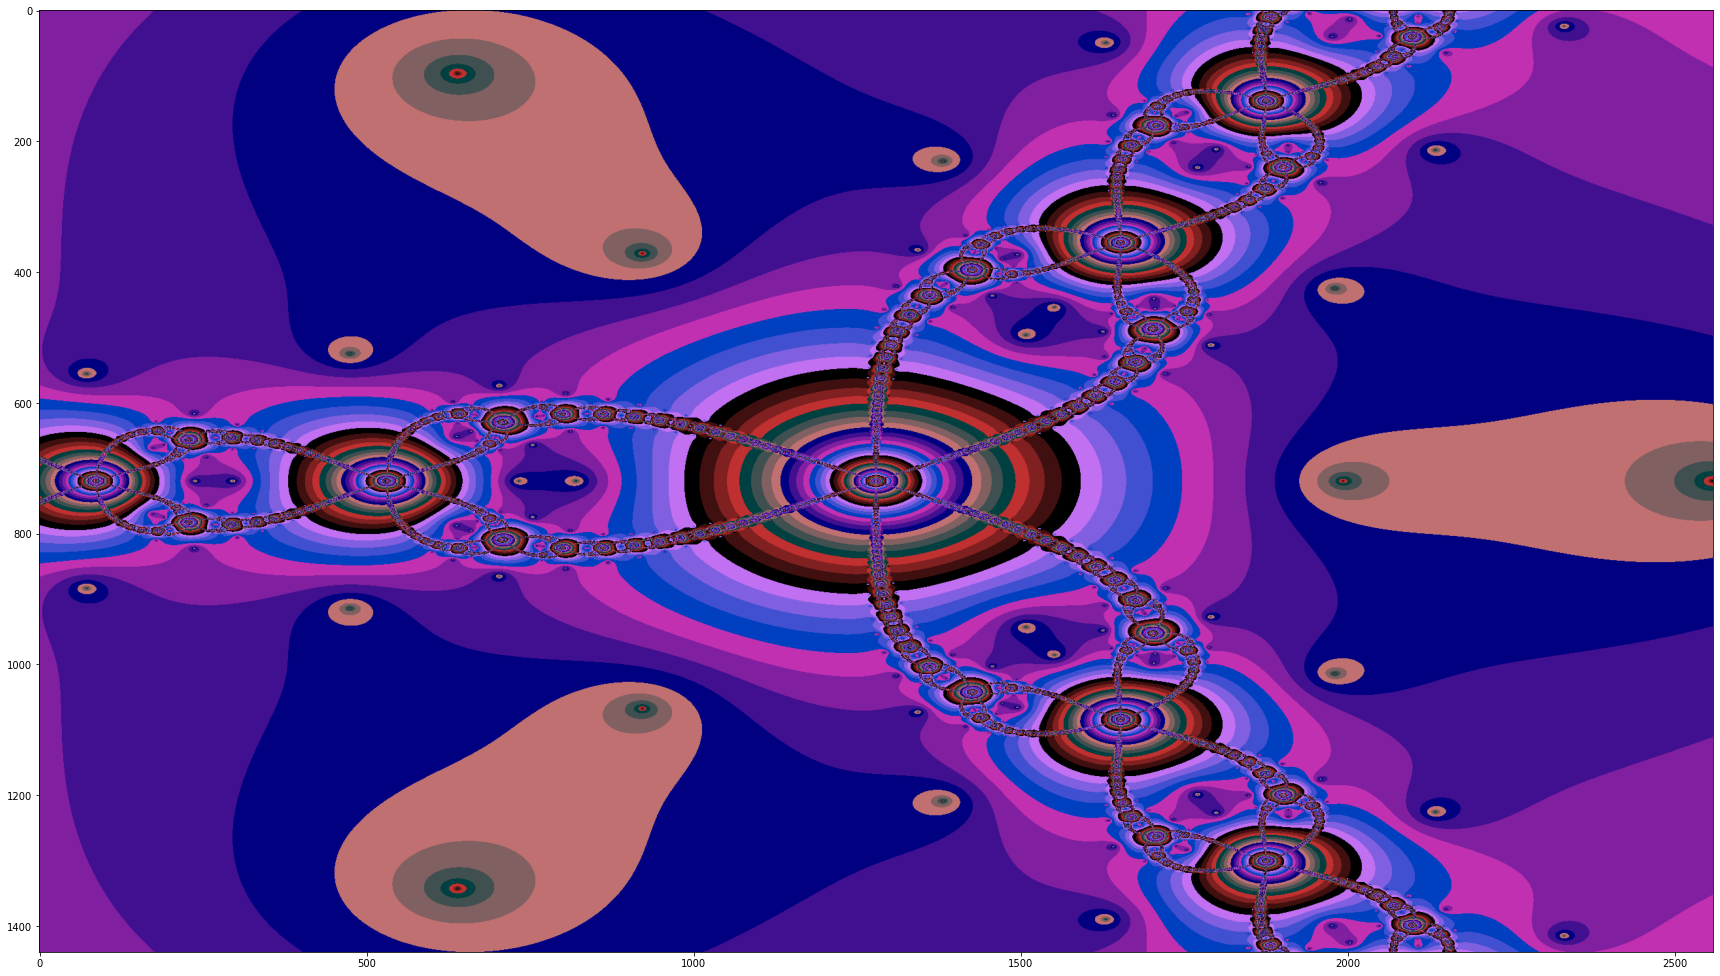

In [61]:

import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 2560 #Numero de pixeles en x
Npx_Y = 1440 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h


a = 0.5
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)

      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break 

        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16

      image.putpixel((x,y), (r,g,b) )

plt.figure(figsize=(30,30))
plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)